In [1]:
################ For testing purposes only ################
try:
   testMode
except NameError:
   testMode = False

try:
    alignmentFile
except NameError:
   # NOTE: this is for a local example. Based on file placement, you may have to change this path
    alignmentFile = os.getcwd() + "/../chr17.7500000-7515000.sam.adam"

In [2]:
import os 

from bdgenomics.adam.adamContext import ADAMContext
from bdgenomics.adam.rdd import AlignmentRecordRDD, CoverageRDD

from bdgenomics.mango.alignments import  *

In [3]:
try:
   ac
except NameError:
   ac = ADAMContext(spark)

# load file
alignment = ac.loadAlignments(alignmentFile)

## Create Summary for Alignment Data

In [4]:
ad = AlignmentSummary(spark, ac, alignment)

In [5]:
indels = ad.getIndelDistribution(bin_size=500)


Computing Indel distributions...


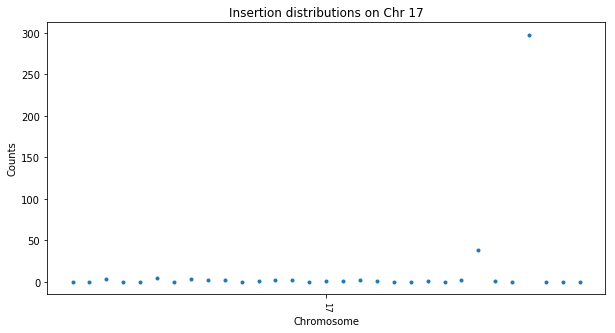

In [6]:
ax, results = indels.plot(plotType="I", testMode=testMode)

if (ax != None):
    ax.set_title("Insertion distributions on Chr 17")
    ax.set_xlabel("Chromosome")
    ax.set_ylabel("Counts")
    plt.show()

## Draw Coverage Distribution for Alignment Data

In [7]:
cov = ad.getCoverageDistribution()

Computing coverage distributions...


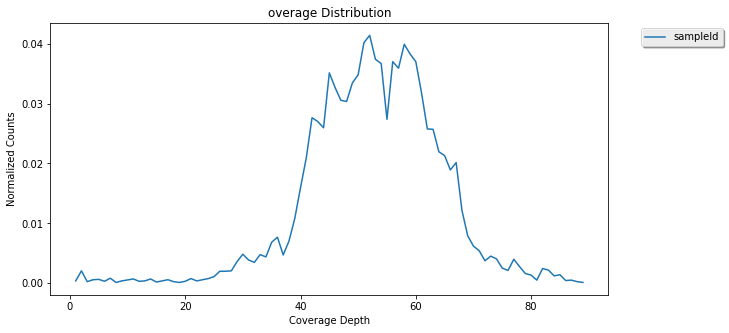

In [8]:
ax, data = cov.plotDistributions()

if (ax != None and not testMode):
    ax.set_title("overage Distribution")
    ax.set_xlabel("Coverage Depth")
    ax.set_ylabel("Normalized Counts")
    plt.show()

## Draw Fragment Distribution for Alignment Data

In [10]:
fragments = ad.getFragmentDistribution()

Computing fragment distributions...


Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 8.0 failed 1 times, most recent failure: Lost task 0.0 in stage 8.0 (TID 405, localhost, executor driver): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/Users/akmorrow/ADAM/spark-2.2.1-bin-hadoop2.7/python/lib/pyspark.zip/pyspark/worker.py", line 177, in main
    process()
  File "/Users/akmorrow/ADAM/spark-2.2.1-bin-hadoop2.7/python/lib/pyspark.zip/pyspark/worker.py", line 172, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/Users/akmorrow/ADAM/spark-2.2.1-bin-hadoop2.7/python/pyspark/rdd.py", line 2423, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "/Users/akmorrow/ADAM/spark-2.2.1-bin-hadoop2.7/python/pyspark/rdd.py", line 2423, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "/Users/akmorrow/ADAM/spark-2.2.1-bin-hadoop2.7/python/pyspark/rdd.py", line 346, in func
    return f(iterator)
  File "/Users/akmorrow/ADAM/spark-2.2.1-bin-hadoop2.7/python/pyspark/rdd.py", line 1842, in combineLocally
    merger.mergeValues(iterator)
  File "/Users/akmorrow/ADAM/spark-2.2.1-bin-hadoop2.7/python/lib/pyspark.zip/pyspark/shuffle.py", line 236, in mergeValues
    for k, v in iterator:
ValueError: too many values to unpack

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:193)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:234)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:152)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:63)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:287)
	at org.apache.spark.api.python.PairwiseRDD.compute(PythonRDD.scala:404)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:287)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:96)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:53)
	at org.apache.spark.scheduler.Task.run(Task.scala:108)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:338)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1142)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:617)
	at java.lang.Thread.run(Thread.java:745)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1517)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1505)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1504)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1504)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:814)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:814)
	at scala.Option.foreach(Option.scala:245)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:814)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1732)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1687)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1676)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:630)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2029)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2050)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2069)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2094)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:936)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:362)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:935)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:467)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:497)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:214)
	at java.lang.Thread.run(Thread.java:745)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/Users/akmorrow/ADAM/spark-2.2.1-bin-hadoop2.7/python/lib/pyspark.zip/pyspark/worker.py", line 177, in main
    process()
  File "/Users/akmorrow/ADAM/spark-2.2.1-bin-hadoop2.7/python/lib/pyspark.zip/pyspark/worker.py", line 172, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/Users/akmorrow/ADAM/spark-2.2.1-bin-hadoop2.7/python/pyspark/rdd.py", line 2423, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "/Users/akmorrow/ADAM/spark-2.2.1-bin-hadoop2.7/python/pyspark/rdd.py", line 2423, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "/Users/akmorrow/ADAM/spark-2.2.1-bin-hadoop2.7/python/pyspark/rdd.py", line 346, in func
    return f(iterator)
  File "/Users/akmorrow/ADAM/spark-2.2.1-bin-hadoop2.7/python/pyspark/rdd.py", line 1842, in combineLocally
    merger.mergeValues(iterator)
  File "/Users/akmorrow/ADAM/spark-2.2.1-bin-hadoop2.7/python/lib/pyspark.zip/pyspark/shuffle.py", line 236, in mergeValues
    for k, v in iterator:
ValueError: too many values to unpack

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:193)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:234)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:152)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:63)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:287)
	at org.apache.spark.api.python.PairwiseRDD.compute(PythonRDD.scala:404)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:287)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:96)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:53)
	at org.apache.spark.scheduler.Task.run(Task.scala:108)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:338)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1142)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:617)
	... 1 more


In [ ]:
ax, data = fragments.plotDistributions()

if (ax != None and not testMode):
    ax.set_title("Fragment Distribution")
    ax.set_xlabel("Fragment Length")
    ax.set_ylabel("Normalized Counts")
    plt.show()

## Draw Mapping Quality Distribution for Alignment Data

In [11]:
mapq = ad.getMapQDistribution()

Computing MapQ distributions...


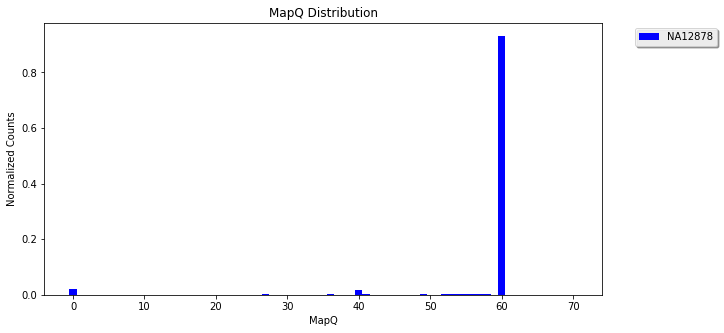

In [13]:
ax, data = mapq.plotDistributions(bar=True)

if (ax != None and not testMode):
    ax.set_title("MapQ Distribution")
    ax.set_xlabel("MapQ")
    ax.set_ylabel("Normalized Counts")
    plt.show()